# Study of Quantum computing fundamentals using Qisket

## Gates
X -> NOT gate. Negates the bits that is flips it from 0 to 1 or 1 to 0

CX -> Controlled NOT gate(CNOT). Works on 2 bits: a control bit and a target bit. If the control bit is 1, the target bit is flipped

In [2]:
import qiskit as q
%matplotlib inline
# Now we are creating our circuit that will run on input bits 
circuit = q.QuantumCircuit(2, 2) # 2 qbits, 2 classical bits
circuit.x(0) # NOT(bit) -> negating qbit at index 0
circuit.cx(0, 1) # CNOT(Control bit, target bit) -> using bit at index 0 as control bit for bit1
circuit.measure([0, 1], [0, 1]) # Measuring the qbits collapses them
circuit.draw() # This function draws the circuit in ASCII

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

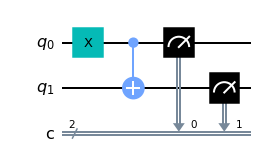

In [2]:
circuit.draw(output="mpl") # I prefer this version

This circuit is used for the quantum entanglement of 2 qubits (We will see this later)

In [4]:
from qiskit import IBMQ
IBMQ.load_account() # IBM API key already loaded 

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
provider = IBMQ.get_provider("ibm-q")
# Looking at all IBM machines available
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits) # Number of qbits available
    except:
        qubit_count = "simulated" # Simulators do not limit us on qbits like the actual machines
    print(f"{backend.name()} has {backend.status().pending_jobs} queue and {qubit_count} qubits")

ibmq_qasm_simulator has 5 queue and simulated qubits
ibmqx2 has 873 queue and 5 qubits
ibmq_16_melbourne has 137 queue and 15 qubits
ibmq_armonk has 6 queue and 1 qubits
ibmq_athens has 1 queue and 5 qubits
ibmq_santiago has 125 queue and 5 qubits
ibmq_lima has 0 queue and 5 qubits
ibmq_belem has 4 queue and 5 qubits
ibmq_quito has 7 queue and 5 qubits
simulator_statevector has 6 queue and simulated qubits
simulator_mps has 6 queue and simulated qubits
simulator_extended_stabilizer has 6 queue and simulated qubits
simulator_stabilizer has 6 queue and simulated qubits
ibmq_manila has 54 queue and 5 qubits


In [6]:
from qiskit.tools.monitor import job_monitor
 # Athens machine had a queue of 3 and qbit count of 5 when I first ran the notebook so I chose it
backend = provider.get_backend("ibmq_athens")
job = q.execute(circuit, backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


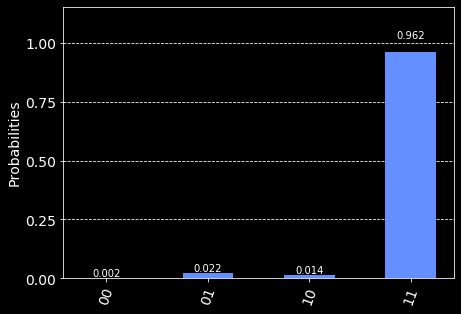

In [7]:
from qiskit.visualization import plot_histogram # Plots hostograms of the probabilities of qbits collapsing to a particular state
from matplotlib import style 

style.use("dark_background") # Remove this if you do not use dark theme on your notebook

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

Here, probability of the qbits collapsing to 00 is 0.002 and that of them collapsing to 11 is 0.962

# Visualizing Gates on Qbits
First let us establish how a qbit is represented
Usual classical bits that we are used to are just special cases of qbits.
Qbits are represented as 
$
\begin{pmatrix}a \\ b\end{pmatrix}
$ where a & are complex numbers and $\begin{vmatrix} |a|^{2} + |b|^{2} \end{vmatrix}$ = 1

Another important thing to note is that in this representation, a is the probability of the qbit collapsing to 0 and b is the probability of the qbit collapsing to 1.

For eg: |0> = $\begin{pmatrix}1 \\ 0\end{pmatrix}$ -> 1 = probability of collapsing to 0

lly, $\begin{pmatrix}1/\sqrt{2} & 1/\sqrt{2}\\ 1/\sqrt{2} & 1/\sqrt{2}\end{pmatrix}$ -> Equal probability of 0 or 1 (Equal superposition)
        
We will be using what is called a Bloch sphere to represent our Hilbert space to visualize the qbits asa vectors in 3 dimensions
(A Hilbert space is an extension of the Euclidean space, just for infinite dimensions)


In [83]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from matplotlib import style


from mpl_toolkits.mplot3d import Axes3D # To handle 3d projection

In [84]:
# Using simulators since the actual machines put you in a queue for 5 minutes for even the smallest of operations
statevec_simulator = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend('qasm_simulator')
# Function that passes the circuit to the simulator through the API and gets the results 
def do_job(circuit):
    job = q.execute(circuit, backend=statevec_simulator)
    result = job.result()
    statevec = result.get_statevector()
    
    n_qubits = circuit.num_qubits
    circuit.measure([i for i in range(n_qubits)], [i for i in range(n_qubits)])
    
    qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
    counts = qasm_job.get_counts()
    
    return statevec, counts

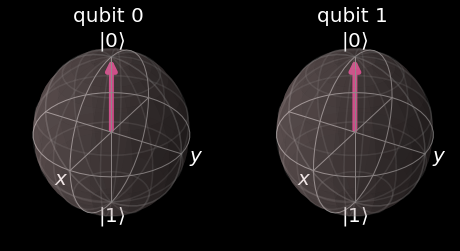

In [85]:
circuit = q.QuantumCircuit(2, 2)
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

As we can see, the qbits collapsed to 0

# Hadamard gate
Puts a qbit into exactly equal superposition

So, H|0> =  $\begin{pmatrix}1/\sqrt{2} & 1/\sqrt{2}\\ 1/\sqrt{2} & -1/\sqrt{2}\end{pmatrix}$  $\begin{pmatrix}1\\0\end{pmatrix}$
         =  $\begin{pmatrix}1/\sqrt{2}\\ 1/\sqrt{2}\end{pmatrix}$ 
         
-> This qbit clearly has equal probability of collapsing to a 0 or 1 (equal superposition)

lly, H|1> = $\begin{pmatrix}1/\sqrt{2} & 1/\sqrt{2}\\ 1/\sqrt{2} & -1/\sqrt{2}\end{pmatrix}$  $\begin{pmatrix}0\\1\end{pmatrix}$
         =  $\begin{pmatrix}1/\sqrt{2}\\ -1/\sqrt{2}\end{pmatrix}$ 
         
-> This qbit too has equal probability of collapsing to a 0 or 1 (equal superposition)

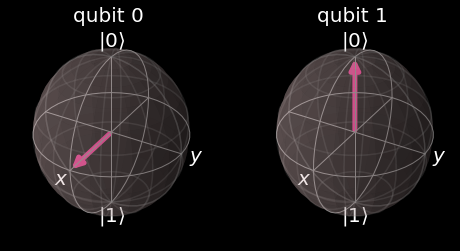

In [168]:
circuit = q.QuantumCircuit(2,2)  # 2 qbits, 2 cbits
circuit.h(0)  # hadamard gate on qbit0
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

As was expected, we see qbit 0 has been rotated around the y-axis by the Hadamard gate. 

# Quantum Entanglement
If the product state of 2 qbits cannot be factored, they are said to be entangled.

Eg: $\begin{pmatrix}1/\sqrt{2}\\0\\0\\1/\sqrt{2}\end{pmatrix}$ = $\begin{pmatrix}a\\b\end{pmatrix}$ ⊗ $\begin{pmatrix}c\\d\end{pmatrix}$

Here, ac = 1/$\sqrt{2}, ad = 0, bc = 0, bd = 1/\sqrt{2}$

Thus, this can clearly not be factored and so the qbits are inferred to be entangled

Qbits can be entangled by using Hadamard gate on 1 qbit and use it as the control bit for CNOT with the the bit to be entangled 

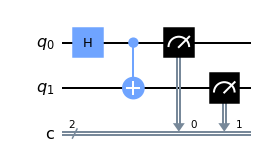

In [171]:
circuit = q.QuantumCircuit(2,2)  # 2 qbits, 2 cbits 
circuit.h(0)  # H on qbit0
circuit.cx(0,1)  # CNOT on control: 0 target: 1
statevec, counts = do_job(circuit)
circuit.draw(output="mpl")

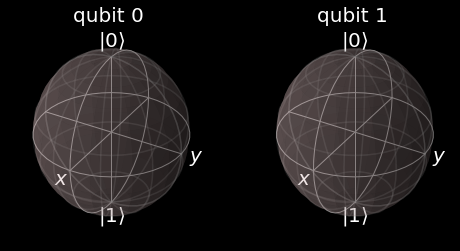

In [172]:
plot_bloch_multivector(statevec)

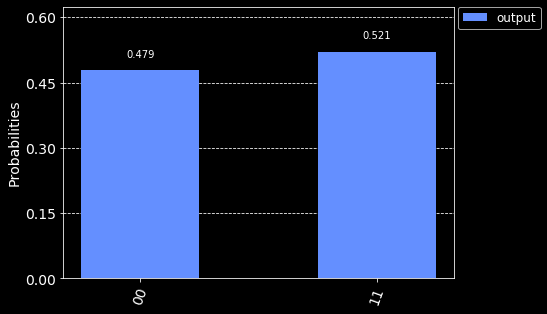

In [173]:
plot_histogram([counts], legend=['output'])

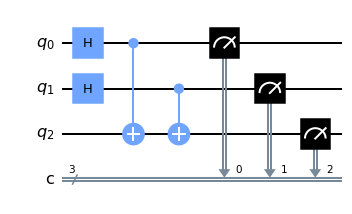

In [177]:
circuit = q.QuantumCircuit(3,3)  # 3 qbits, 3 cbits
circuit.h(0)
circuit.h(1)
circuit.cx(0,2)
circuit.cx(1,2)
statevec, counts = do_job(circuit)
circuit.draw(output="mpl")

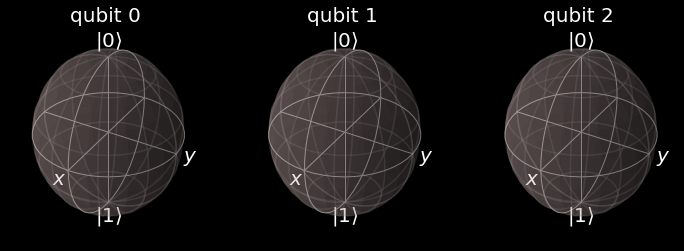

In [178]:
plot_bloch_multivector(statevec)

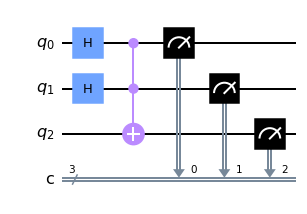

In [179]:
circuit = q.QuantumCircuit(3,3)  # 3 qbits, 3 cbits 
circuit.h(0)
circuit.h(1)
circuit.ccx(0,1,2) # Control control not
statevec, counts = do_job(circuit)
circuit.draw(output="mpl")

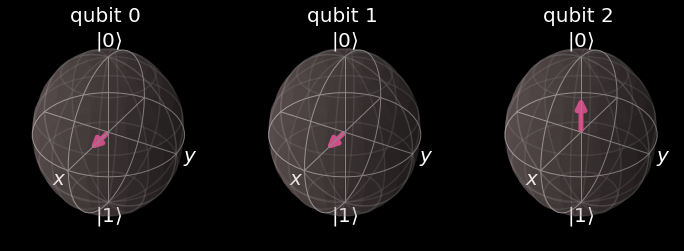

In [180]:
plot_bloch_multivector(statevec)

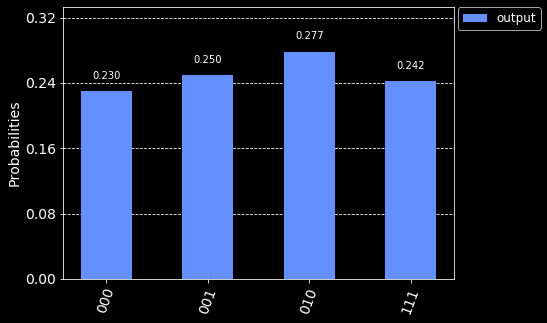

In [93]:
plot_histogram([counts], legend=['output'])

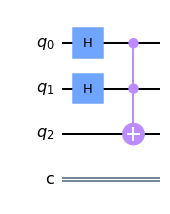

In [181]:
circuit = q.QuantumCircuit(3,1)  # 3 qbits, only 1 cbit
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.draw(output="mpl")

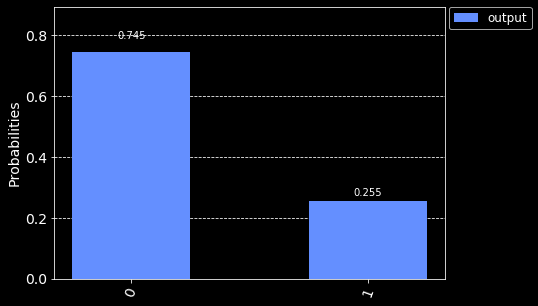

In [182]:
circuit.measure([2], [0])  # map qbit atindex 2 to cbit at 0.
result = q.execute(circuit, backend=qasm_sim, shots=1024).result()
counts = result.get_counts()
plot_histogram([counts], legend=['output'])

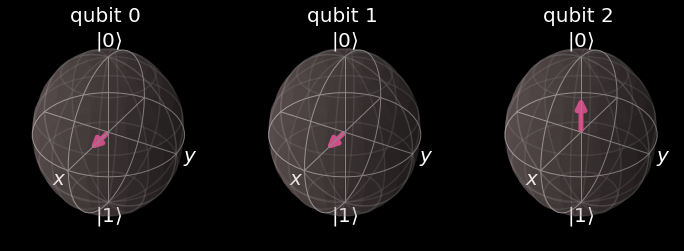

In [96]:
import math

circuit = q.QuantumCircuit(3,3)  # 3 qbits, 3 cbits
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled CNOT

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

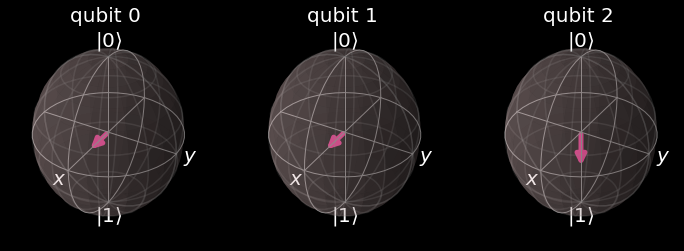

In [97]:
circuit = q.QuantumCircuit(3,3)   # 3 qubits, 3 cbitst
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled CNOT
circuit.rx(math.pi, 2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

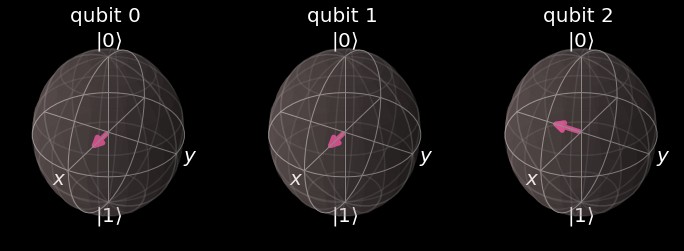

In [98]:
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/2, 2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

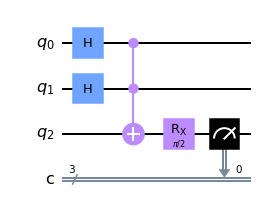

In [184]:
circuit = q.QuantumCircuit(3,3) 
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled CNOT
circuit.rx(math.pi/2, 2)
circuit.measure([2], [0])  # map qbit at index 2, to cbit at 0.
circuit.draw(output="mpl")

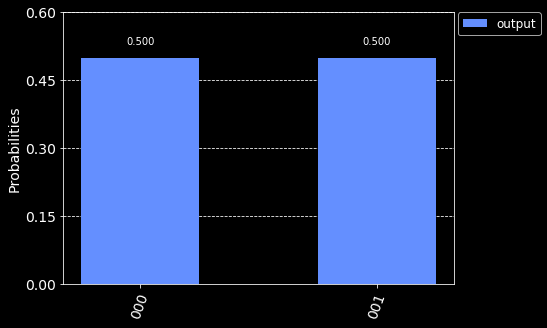

In [185]:
result = q.execute(circuit, backend=qasm_sim, shots=1024).result()
counts = result.get_counts()
plot_histogram([counts], legend=['output'])

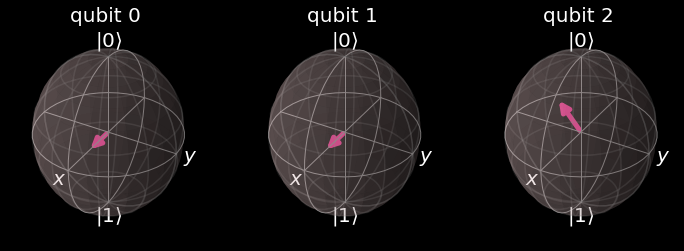

In [101]:
circuit = q.QuantumCircuit(3,3)  # 3 qbits, 3 cbits
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled CNOT
circuit.rx(math.pi/4, 2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

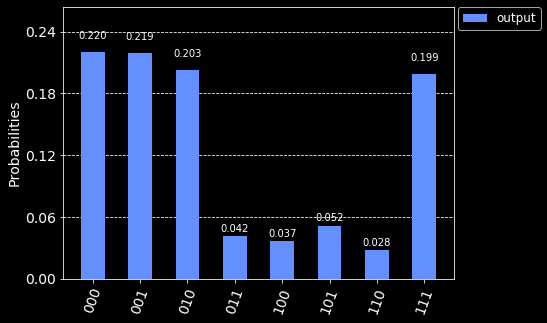

In [102]:
plot_histogram([counts], legend=['output'])

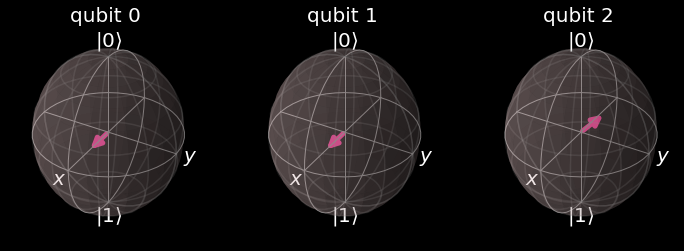

In [103]:
circuit = q.QuantumCircuit(3,3)  # 3 qbits, 3 cbits
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled CNOT
circuit.rx(math.pi/4, 2)
circuit.rz(math.pi, 2)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

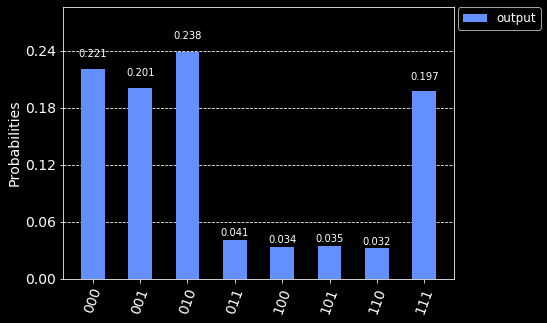

In [104]:
plot_histogram([counts], legend=['output'])

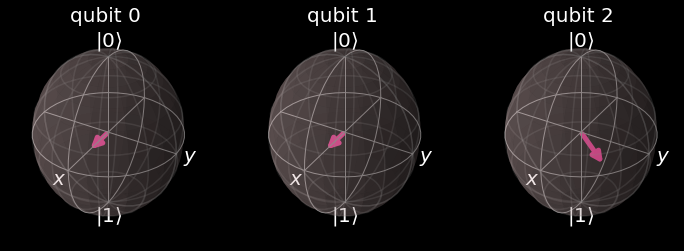

In [105]:
circuit = q.QuantumCircuit(3,3)  # 3 qbits, 3 cbits
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled CNOT
circuit.rx(math.pi/4, 2)
circuit.rz(math.pi, 2)
circuit.ry(math.pi, 2)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

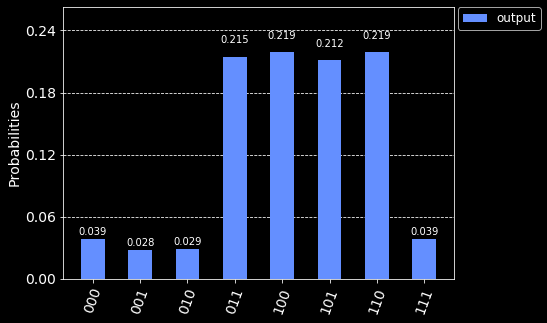

In [106]:
plot_histogram([counts], legend=['output'])

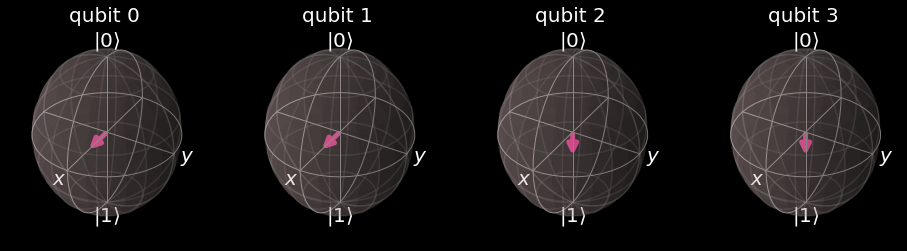

In [107]:
circuit = q.QuantumCircuit(4,4)  # 4 qbits, 4 cbits
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled CNOT
circuit.rx(math.pi/4, 2)
circuit.rz(math.pi, 2)
circuit.ry(math.pi, 2)
circuit.cx(2,3)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

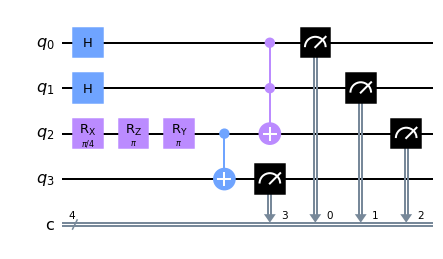

In [187]:
circuit = q.QuantumCircuit(4,4)  # 3 qbits, 3 cbits
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.rx(math.pi/4, 2)
circuit.rz(math.pi, 2)
circuit.ry(math.pi, 2)
circuit.cx(2,3)
circuit.ccx(0,1,2)  # controlled CNOT
statevec, counts = do_job(circuit)
circuit.draw(output="mpl")

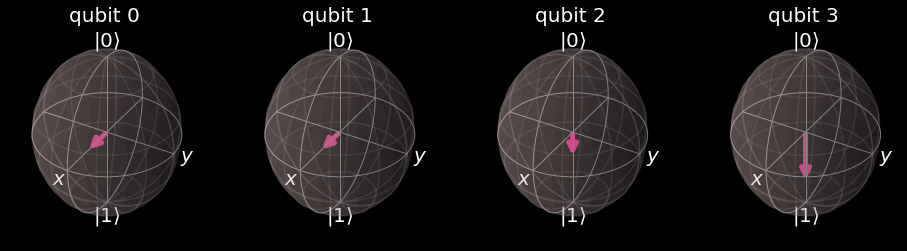

In [109]:
plot_bloch_multivector(statevec)

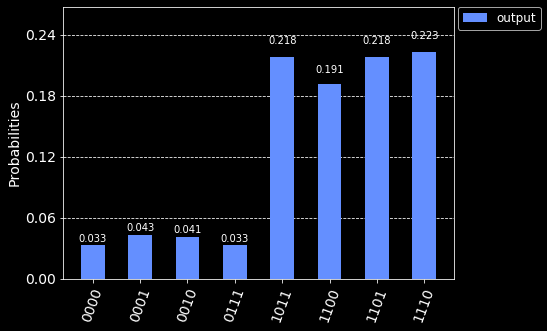

In [110]:
plot_histogram([counts], legend=['output'])

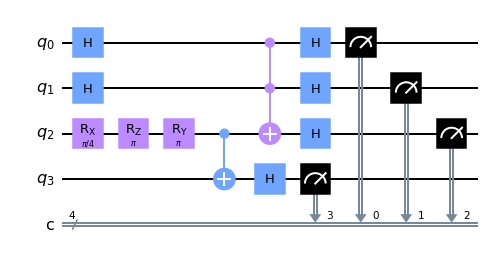

In [189]:
circuit = q.QuantumCircuit(4,4)  # 4 qbits, 4 cbits
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.rx(math.pi/4, 2)
circuit.rz(math.pi, 2)
circuit.ry(math.pi, 2)
circuit.cx(2,3)

circuit.ccx(0,1,2)  # controlled CNOT

circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.h(3)
statevec, counts = do_job(circuit)
circuit.draw(output="mpl")

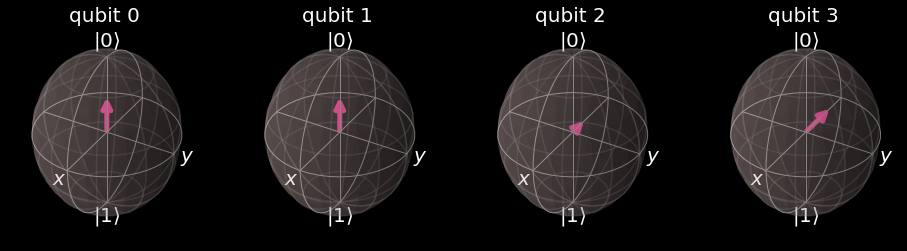

In [112]:
plot_bloch_multivector(statevec)

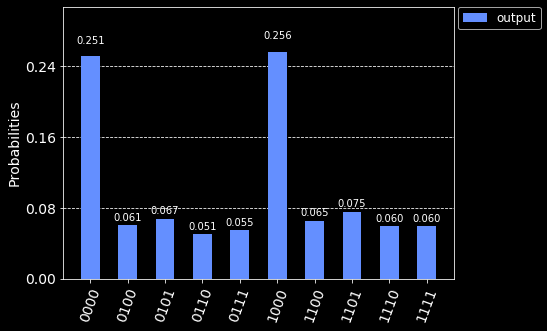

In [113]:
plot_histogram([counts], legend=['output'])

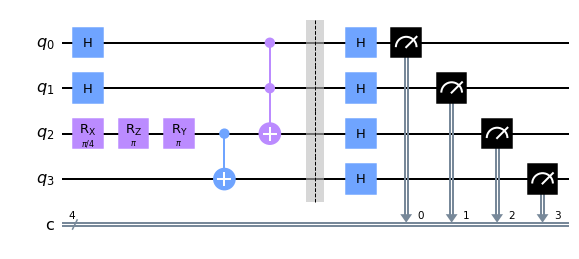

In [191]:
circuit = q.QuantumCircuit(4,4)  # 4 qbits, 4 cbits
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.rx(math.pi/4, 2)
circuit.rz(math.pi, 2)
circuit.ry(math.pi, 2)
circuit.cx(2,3)

circuit.ccx(0,1,2)  # controlled CNOT
circuit.barrier()
circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.h(3)
statevec, counts = do_job(circuit)
circuit.draw(output="mpl")

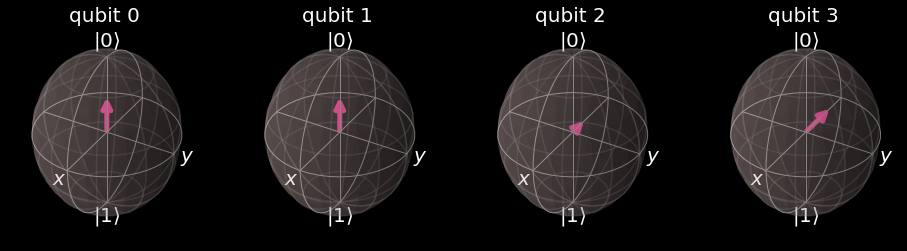

In [115]:
plot_bloch_multivector(statevec)

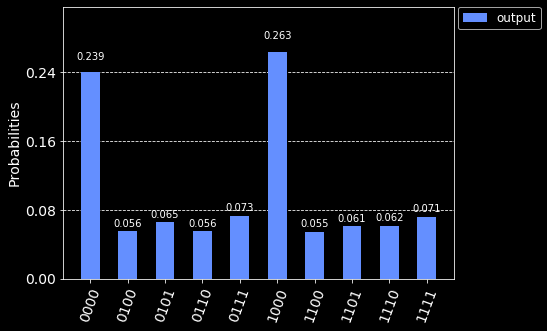

In [116]:
plot_histogram([counts], legend=['output'])

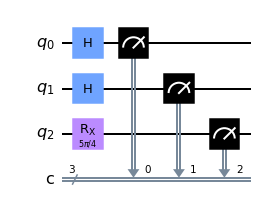

In [192]:
circuit = q.QuantumCircuit(3,3)  # 3 qbits, 3 cbits
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.rx(math.pi*1.25, 2)
statevec, counts = do_job(circuit)
circuit.draw(output="mpl")

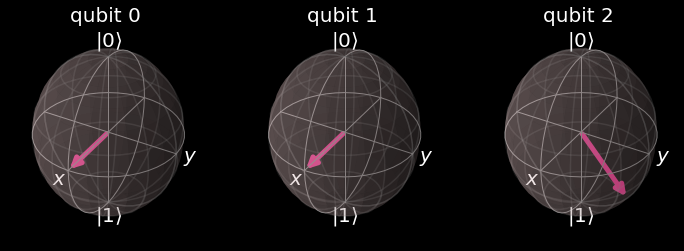

In [193]:
plot_bloch_multivector(statevec)

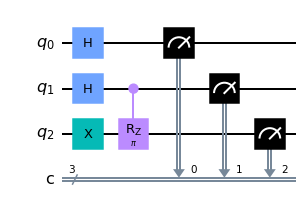

In [194]:
circuit = q.QuantumCircuit(3,3)  # 3 qbits, 3 cbits
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.x(2)
circuit.crz(math.pi, 1, 2)  # theta, control, target
statevec, counts = do_job(circuit)
circuit.draw(output="mpl")

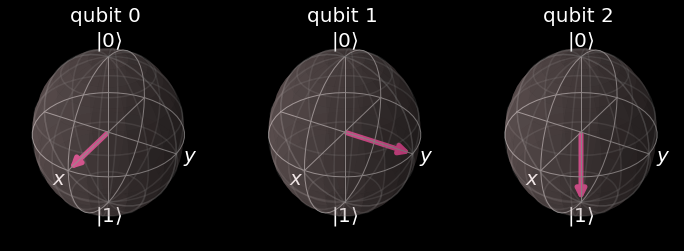

In [120]:
plot_bloch_multivector(statevec)

In [121]:
qasm_sim = q.Aer.get_backend('qasm_simulator')
statevec_sim = q.Aer.get_backend("statevector_simulator")

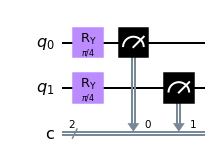

In [195]:
c = q.QuantumCircuit(2,2)
c.ry(math.pi/4,0)
c.ry(math.pi/4,1)
orig_statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qbit 3, which is impacted by those cnots
c.draw(output="mpl")

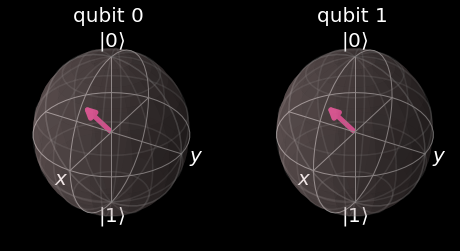

In [124]:
plot_bloch_multivector(orig_statevec)

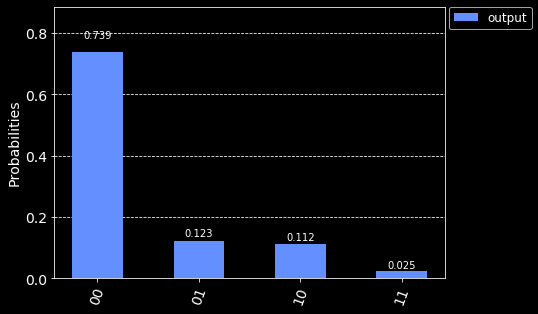

In [125]:
orig_counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['output'])

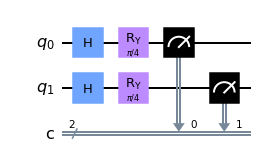

In [197]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.ry(math.pi/4,0)
c.ry(math.pi/4,1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qbit 3, which is impacted by those cnots
c.draw(output="mpl")

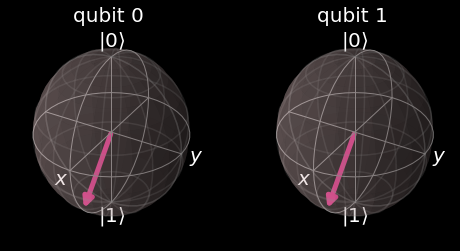

In [127]:
plot_bloch_multivector(statevec)

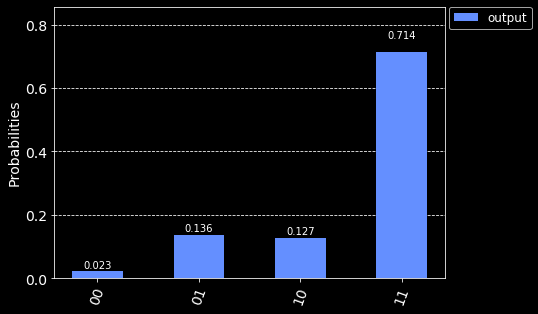

In [128]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

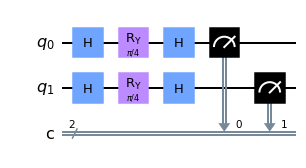

In [198]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.ry(math.pi/4,0)
c.ry(math.pi/4,1)
c.h(0)
c.h(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qbit 3, which is impacted by those cnots
c.draw(output="mpl")

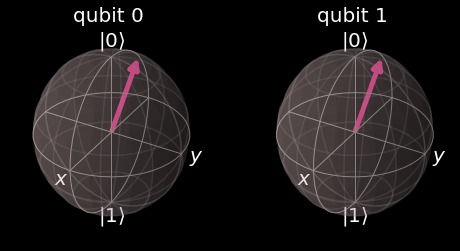

In [130]:
plot_bloch_multivector(statevec)

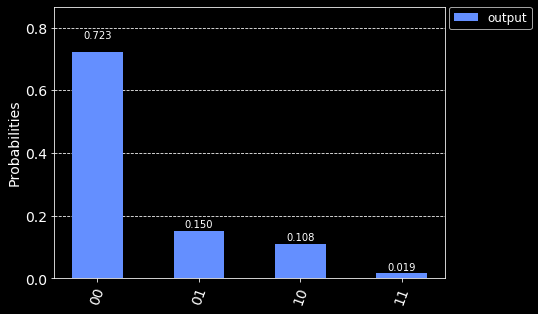

In [131]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

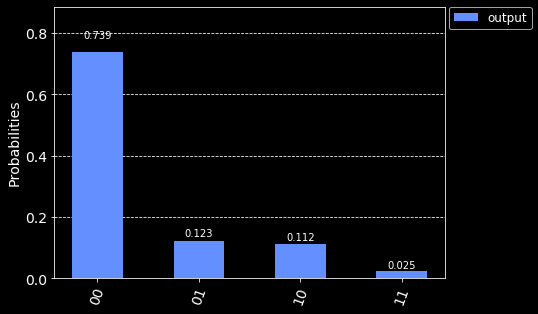

In [132]:
plot_histogram([orig_counts], legend=['output'])

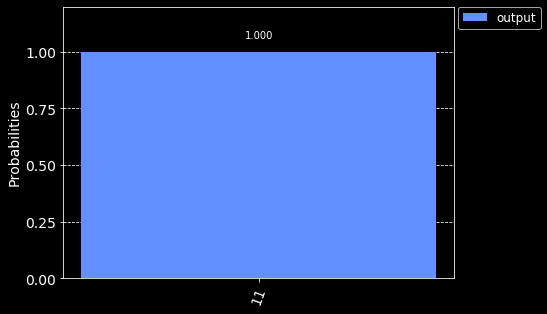

In [133]:
c = q.QuantumCircuit(2,2)
c.x(0)
c.x(1)
orig_statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots
orig_counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['output'])

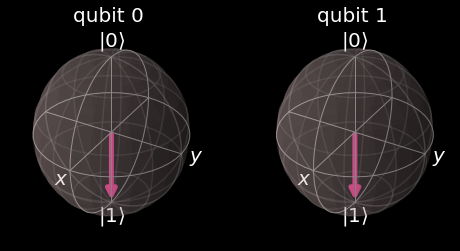

In [134]:
plot_bloch_multivector(orig_statevec)

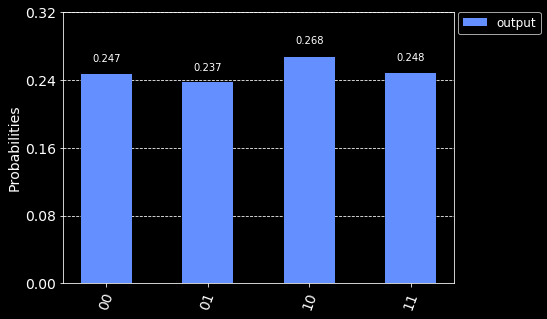

In [135]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.x(0)
c.x(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qbit 3, which is impacted by those cnots
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

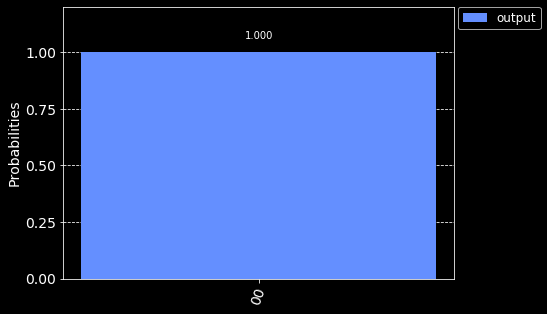

In [136]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.x(0)
c.x(1)
c.h(0)
c.h(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

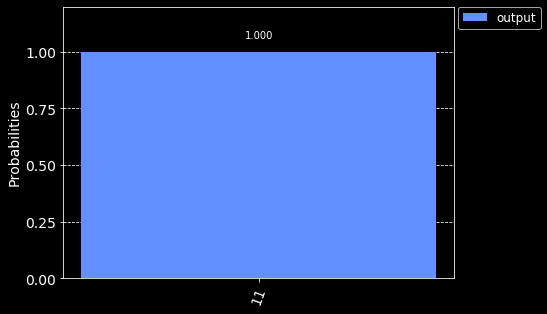

In [137]:
plot_histogram([orig_counts], legend=['output'])

# The Deutsch Oracle
The Deutsch oracle problem is that: given a black box which has a function that works on a single bit(possible functions on a single bit are identity, negation, set-0 and set-1), how many queries would you need to figure out what operation the function performs.(A query corresponds to giving the black box an input)
The Deutsch oracle problem requires 2 queries on both a classical and a quantum computer. This is due to the fact that at the end of the day, the output of the quantum computer collapses to a single bit as well and a single bit is not enough to identify the operation. But Quantum computers can famously solve a variant of the problem and figure out just the type of operation occurring in the black box.


The types of operations on bits are:

constant: set-0 or set-1

Variable: Identity or negation 

In [138]:
# Creating 2 black boxes
def balanced_black_box(c):
    c.cx(0,2)
    c.cx(1,2)
    return c
    
def constant_black_box(c):
    # outputs whatever you put in. 
    return c

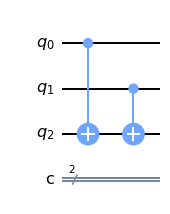

In [199]:
c = q.QuantumCircuit(3,2)
c = balanced_black_box(c)
c.draw(output="mpl")

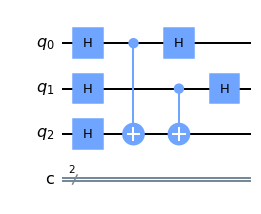

In [201]:
c = q.QuantumCircuit(3,2)
c.h(0)
c.h(1)
c.h(2)
c = balanced_black_box(c)
c.h(0)
c.h(1)
# no need for ending H on q[2]
c.draw(output="mpl")

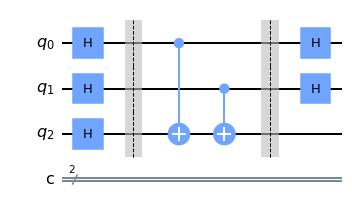

In [202]:
c = q.QuantumCircuit(3,2)
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
# no need for ending H on q[2]
c.draw(output="mpl")

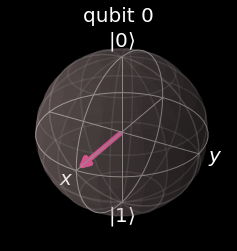

In [142]:
c = q.QuantumCircuit(1,1)
c.h(0)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

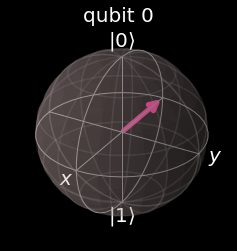

In [143]:
c = q.QuantumCircuit(1,1)
c.x(0)
c.h(0)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

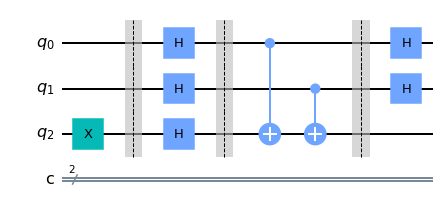

In [204]:
c = q.QuantumCircuit(3,2)
c.x(2)  # adding this not gate
c.barrier() # barrier for clarity
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
# no need for ending H on q[2]
c.draw(output="mpl")

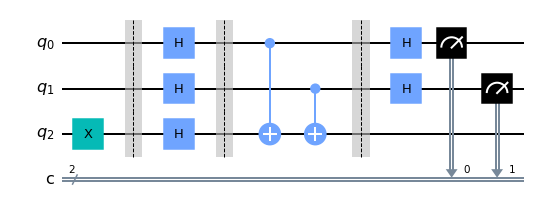

In [205]:
c = q.QuantumCircuit(3,2)
c.x(2)  # adding this not gate
c.barrier() # barrier for clarity
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])
# no need for ending H on q[2]
c.draw(output="mpl")

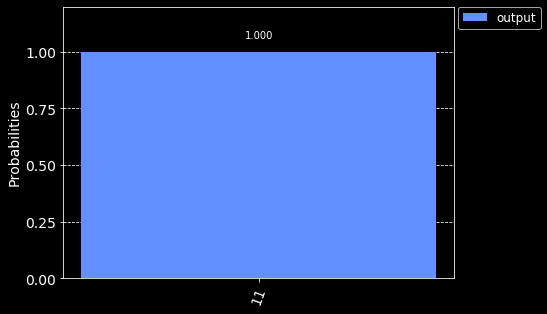

In [146]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

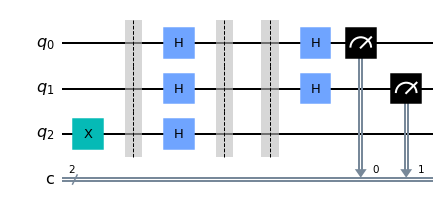

In [206]:
c = q.QuantumCircuit(3,2)
c.x(2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = constant_black_box(c)  # changed to constant box.
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])
c.draw(output="mpl")

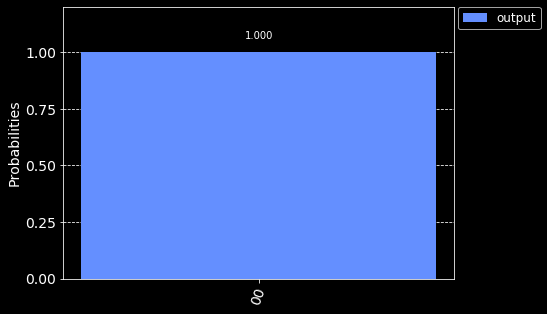

In [148]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

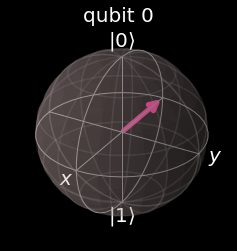

In [149]:
c = q.QuantumCircuit(1,1)
c.x(0)
c.h(0)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

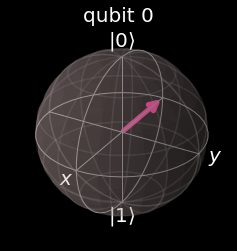

In [150]:
c = q.QuantumCircuit(1,1)
c.ry(math.pi,0)
c.h(0)

statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

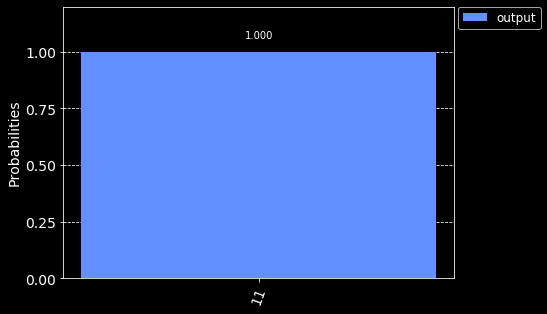

In [151]:
c = q.QuantumCircuit(3,2)

c.barrier()
c.ry(math.pi,2)  # changed c.x(2) to this.
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

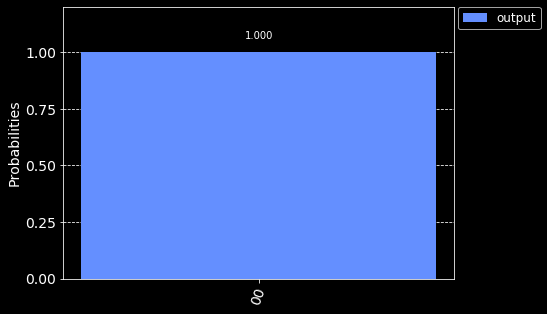

In [152]:
c = q.QuantumCircuit(3,2)
c.ry(math.pi,2)  # changed c.x(2) to this.
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = constant_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

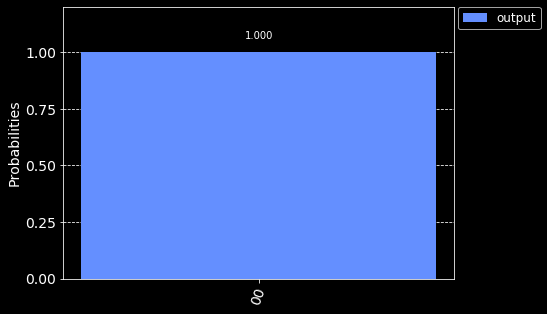

In [153]:
c = q.QuantumCircuit(3,2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.x(2)  # moving the not gate here
c.barrier()
c = constant_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

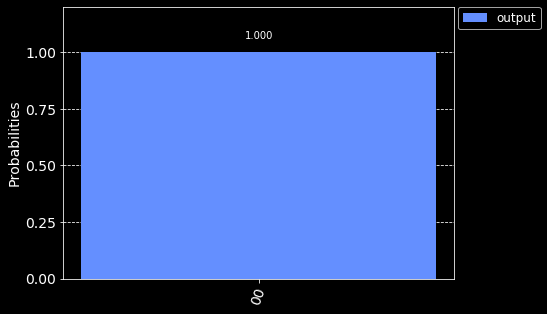

In [154]:
c = q.QuantumCircuit(3,2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.x(2)  # moved the not gate here
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

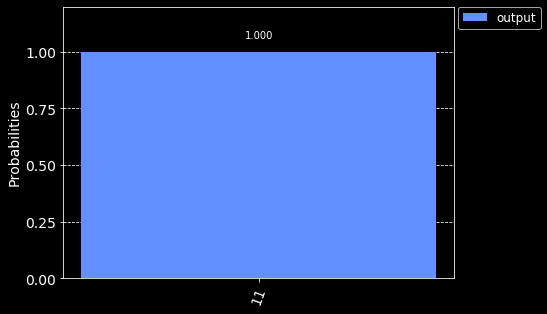

In [155]:
c = q.QuantumCircuit(3,2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.ry(math.pi,2)  # changed c.x(2) to this.
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

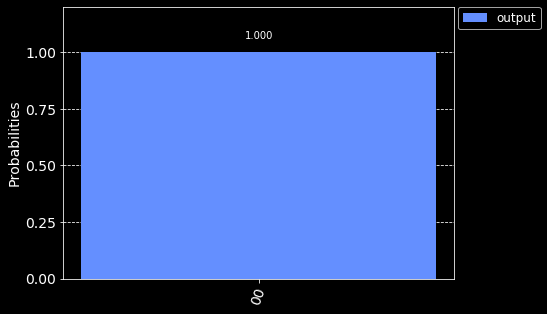

In [156]:
c = q.QuantumCircuit(3,2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.ry(math.pi,2)  
c.barrier()
c = constant_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])